# Decision Tree 실습

# 1. 함수 익히기 및 모듈 불러오기

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from os import system

In [2]:
import graphviz 

- 데이터 로드

In [3]:
iris = load_iris()

iris.data[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# 2. 의사결정나무 구축 및 시각화

- 트리 구축

In [7]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [8]:
clf = tree.DecisionTreeClassifier().fit(iris.data, iris.target)

- 트리의 시각화

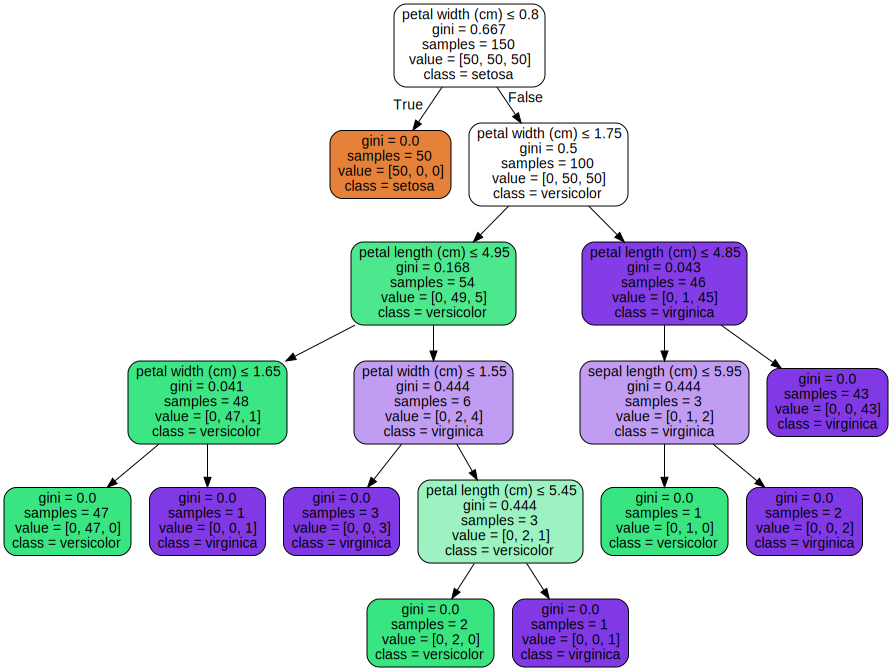

In [9]:
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, 
                                rounded=True,
                                special_characters=True
                               )
graph = graphviz.Source(dot_data)
graph

- 엔트로피를 활용한 트리

In [10]:
clf2 = tree.DecisionTreeClassifier(criterion="entropy").fit(iris.data, iris.target)

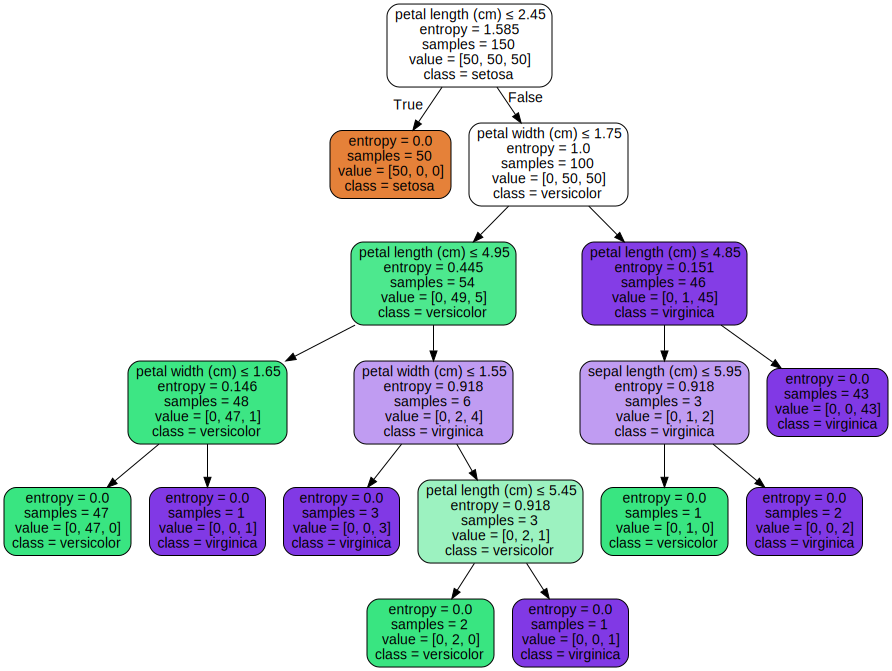

In [11]:
dot_data2 = tree.export_graphviz(clf2, 
                                 out_file=None,
                                 feature_names=iris.feature_names,
                                 class_names=iris.target_names,
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True
                             )
graph2 = graphviz.Source(dot_data2)
graph2

- 프루닝

In [12]:
clf3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2).fit(iris.data,iris.target)

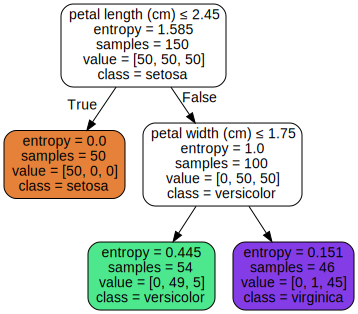

In [13]:
dot_data3 = tree.export_graphviz(clf3, out_file=None,
                                 feature_names=iris.feature_names,
                                 class_names=iris.target_names,
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True
                             )
graph3 = graphviz.Source(dot_data3)
graph3

- Confusion Matrix 구하기

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [15]:
confusion_matrix(iris.target, clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [16]:
confusion_matrix(iris.target, clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

# 3. Training - Test 구분 및 Confusion matrix 계산

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, stratify=iris.target, random_state=1)

In [19]:
clf4 = tree.DecisionTreeClassifier(criterion="entropy")

In [20]:
clf4.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
confusion_matrix(y_test, clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

# 4. Decision regression tree

In [22]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

- Regression tree 구축

In [23]:
regr1 = tree.DecisionTreeRegressor(max_depth=2)
regr2 = tree.DecisionTreeRegressor(max_depth=5)

In [24]:
regr1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
regr2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
X_test[:20]

array([[0.  ],
       [0.01],
       [0.02],
       [0.03],
       [0.04],
       [0.05],
       [0.06],
       [0.07],
       [0.08],
       [0.09],
       [0.1 ],
       [0.11],
       [0.12],
       [0.13],
       [0.14],
       [0.15],
       [0.16],
       [0.17],
       [0.18],
       [0.19]])

In [27]:
y_1 = regr1.predict(X_test)
y_2 = regr2.predict(X_test)

In [28]:
y_1[:30]

array([0.05236068, 0.05236068, 0.05236068, 0.05236068, 0.05236068,
       0.05236068, 0.05236068, 0.05236068, 0.05236068, 0.05236068,
       0.05236068, 0.05236068, 0.05236068, 0.05236068, 0.05236068,
       0.05236068, 0.05236068, 0.05236068, 0.05236068, 0.05236068,
       0.05236068, 0.05236068, 0.05236068, 0.05236068, 0.05236068,
       0.05236068, 0.05236068, 0.05236068, 0.05236068, 0.05236068])

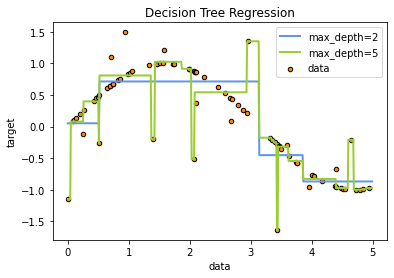

In [29]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")

plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

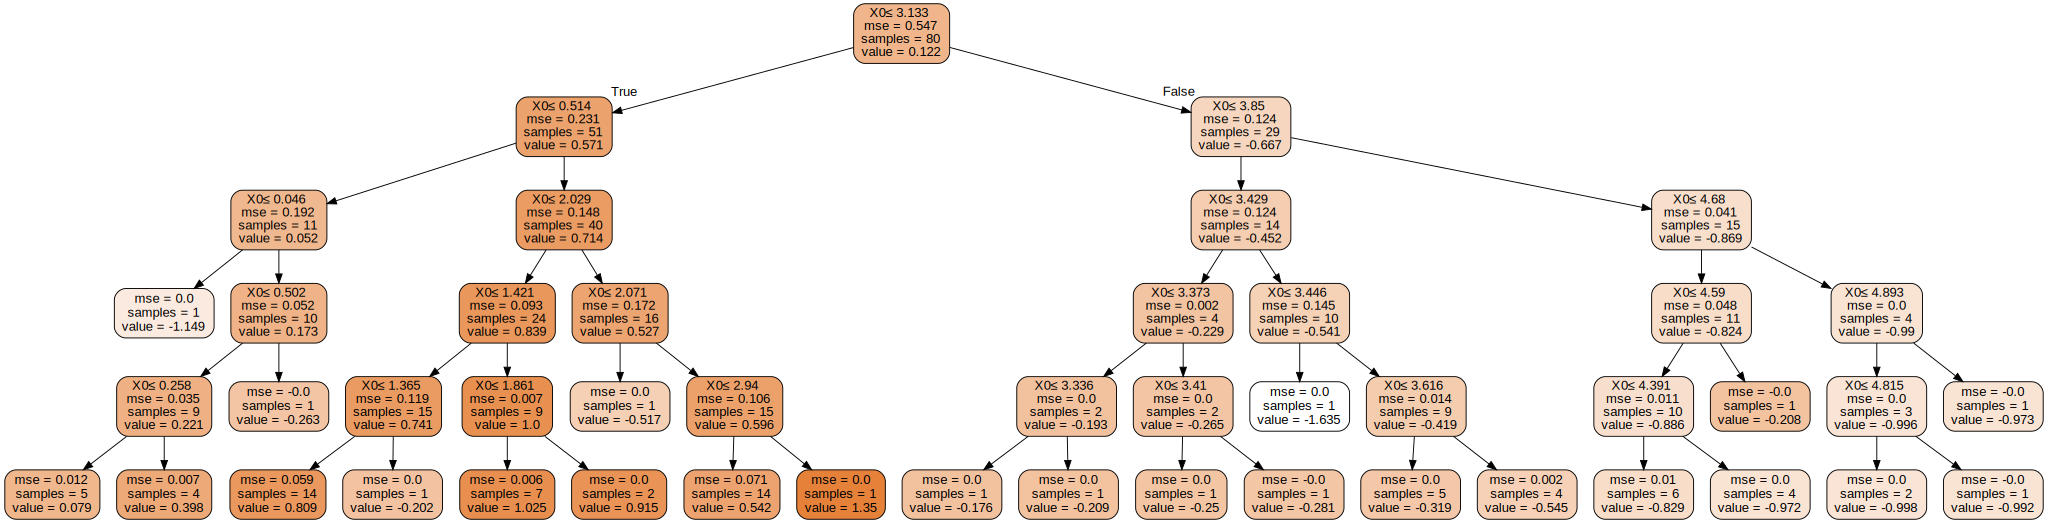

In [30]:
dot_data4 = tree.export_graphviz(regr2, out_file=None, 
                                 filled=True, rounded=True,  
                                 special_characters=True)
graph4 = graphviz.Source(dot_data4) 
graph4

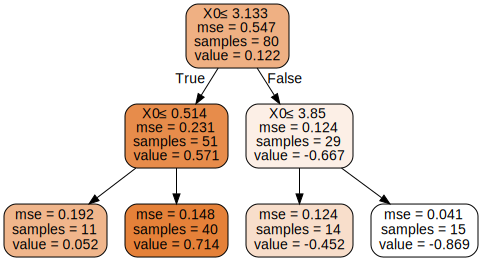

In [31]:
dot_data5 = tree.export_graphviz(regr1, out_file=None, 
                                 filled=True, rounded=True,  
                                 special_characters=True)
graph5 = graphviz.Source(dot_data5)
graph5